# Final and PCA - Project Arrhythmia

In [108]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [109]:
#Loading the required data
df=pd.read_csv("arrhythmia.csv", header = None)

In [110]:
#Inspecting the first 5 rows of the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [111]:
#Inspecting the last 5 rows of the dataset
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [112]:
#Inspecting the dimensionality of the dataset
df.shape

(452, 280)

In [113]:
#Obtaining information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [114]:
#Obtaining description of the dataset
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [115]:
#Inspecting the dataset for null values
pd.isnull(df).sum().sum()

np.int64(0)

In [116]:
#Replacing the "?" in the data with nan method
df = df.replace("?", np.nan)

In [117]:
#Final counting total number of null values in dataset
nv = pd.isnull(df).sum().sum()
nv

np.int64(408)

Text(0, 0.5, 'Total number of null values in each column')

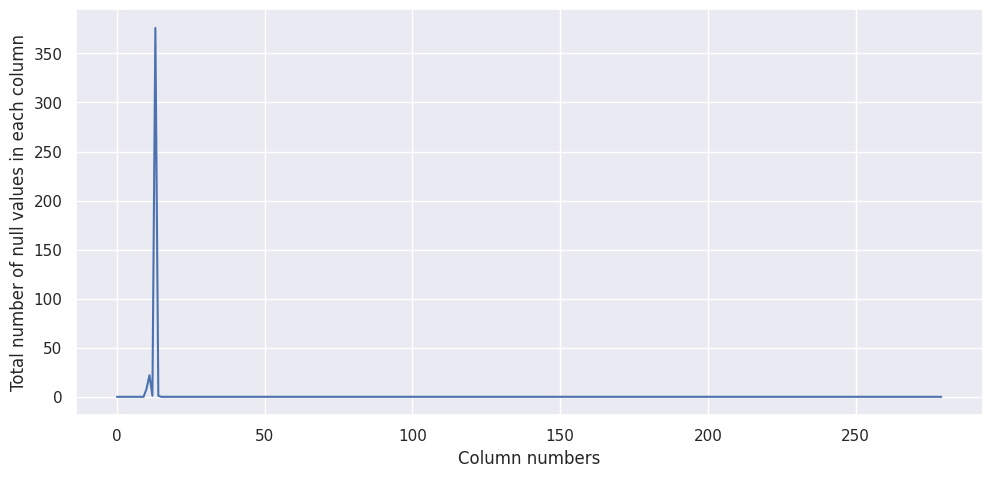

In [118]:
pd.isnull(df).sum().plot()
plt.xlabel("Column numbers")
plt.ylabel("Total number of null values in each column")

Text(0, 0.5, 'Total number of null values in each column')

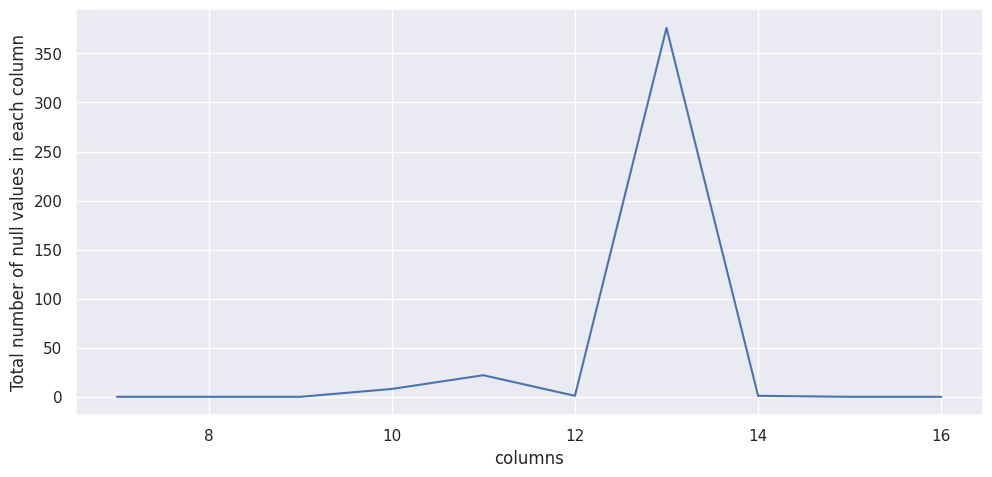

In [119]:
#Zooming in
pd.isnull(df).sum()[7:17].plot(kind='line')
plt.xlabel('columns')
plt.ylabel('Total number of null values in each column')

In [120]:
#Dropping column 13
df.drop(columns=13, inplace=True)

In [121]:
#Making a copy of the dataset (To avoid changes to the main file during imputation)
new_df=df.copy()

In [122]:
#Making new columns indicating the columns that'll be imputed
cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

In [123]:
#Imputation
#my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

In [124]:
#Imputed dataframe
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [125]:
#Dataset with zero null values
pd.isnull(new_df).sum().sum()

np.int64(0)

In [126]:
#Creating column names
final_df_columns = ["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom",
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [127]:
# Adding column names to dataset

new_df.columns = final_df_columns
new_df.to_csv("new data with target class.csv")
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [128]:
target = new_df["class"]
final_df = new_df.drop(columns = 'class')

In [129]:
final_df.shape

(452, 278)

In [130]:
#Exploratory Data Analysis (EDA)

In [131]:
#List with class names
class_names = ["Normal",
               "Ischemic changes (CAD)",
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy",
               "Sinus bradycardy",
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

In [132]:
#Analyzing the dataset and checking how many examples we have for each class
#There is a need to sort dataset with respect to class attributes to count the number of instances available for each class

In [133]:
t = new_df.sort_values("class")

In [134]:
#Counting the number of instances for each class
la = t["class"].value_counts(sort=False).tolist()
la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

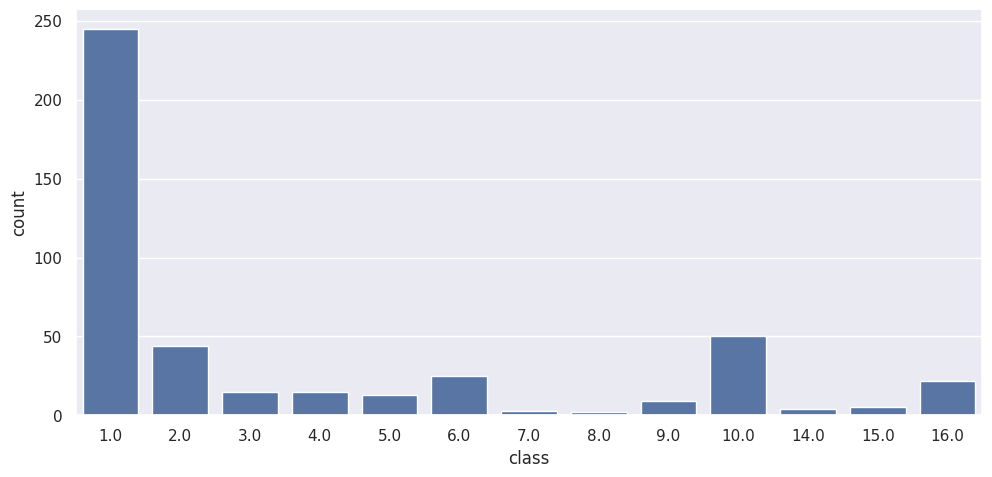

In [135]:
sns.countplot(x='class', data=new_df)
plt.show()

In [136]:
#Counting the total number of instances we have for each class.

In [137]:
values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


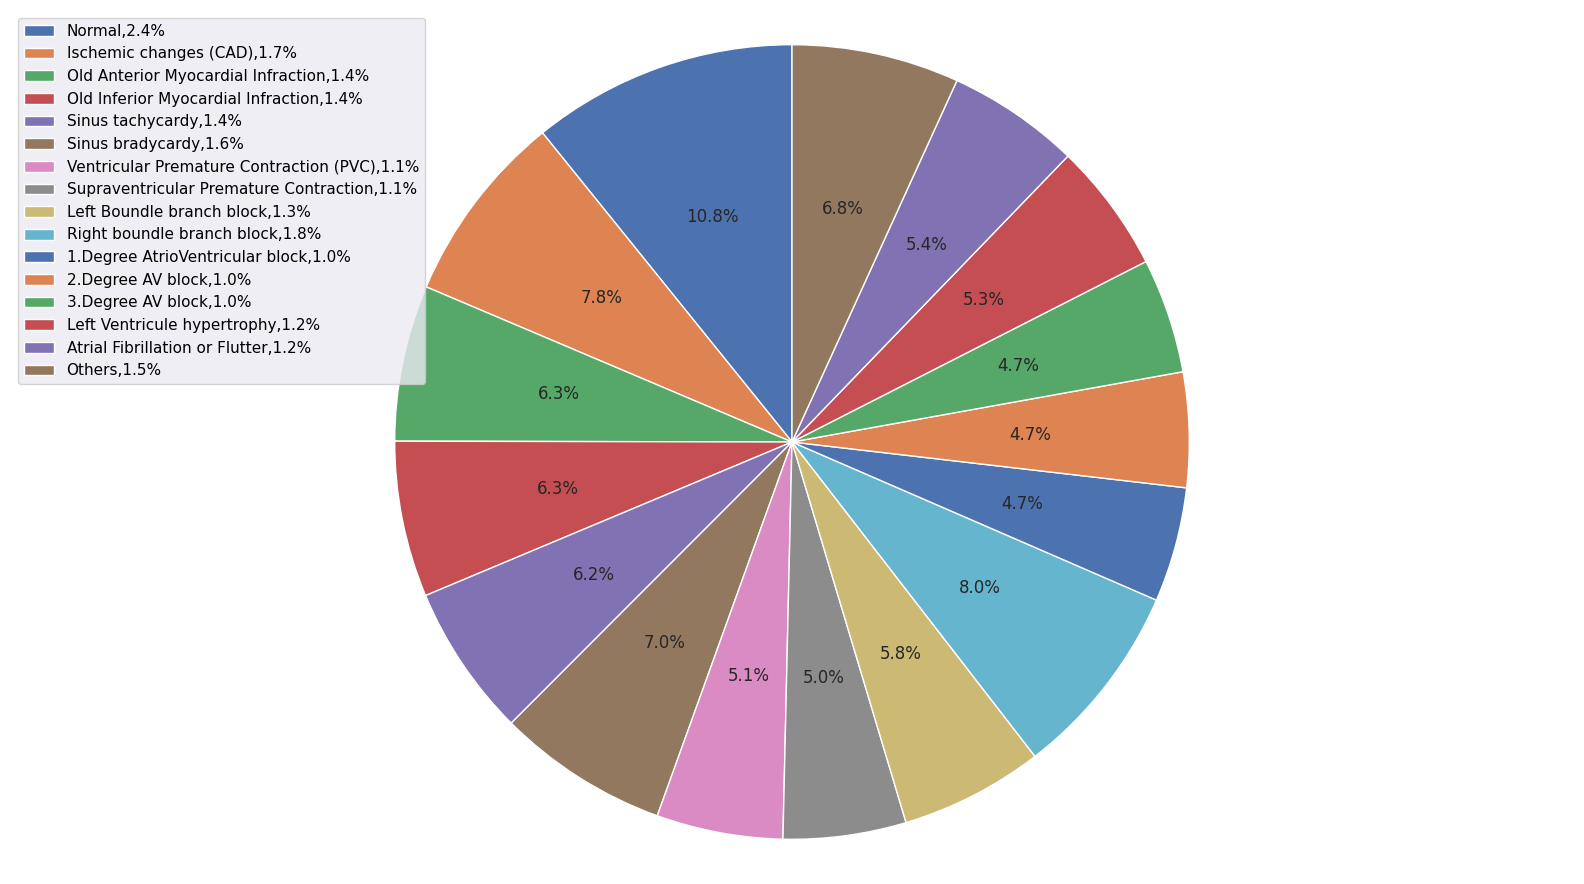

In [138]:
labels = class_names
Log_Norm = []
for i in values:
  Log_Norm.append(mt.log10(i+11))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle = 90)

leg = plt.legend(loc = 'best', labels=['%s,%1.1f%%' % (l,s) for l,s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()

In [139]:
#handling outliers & data visulization

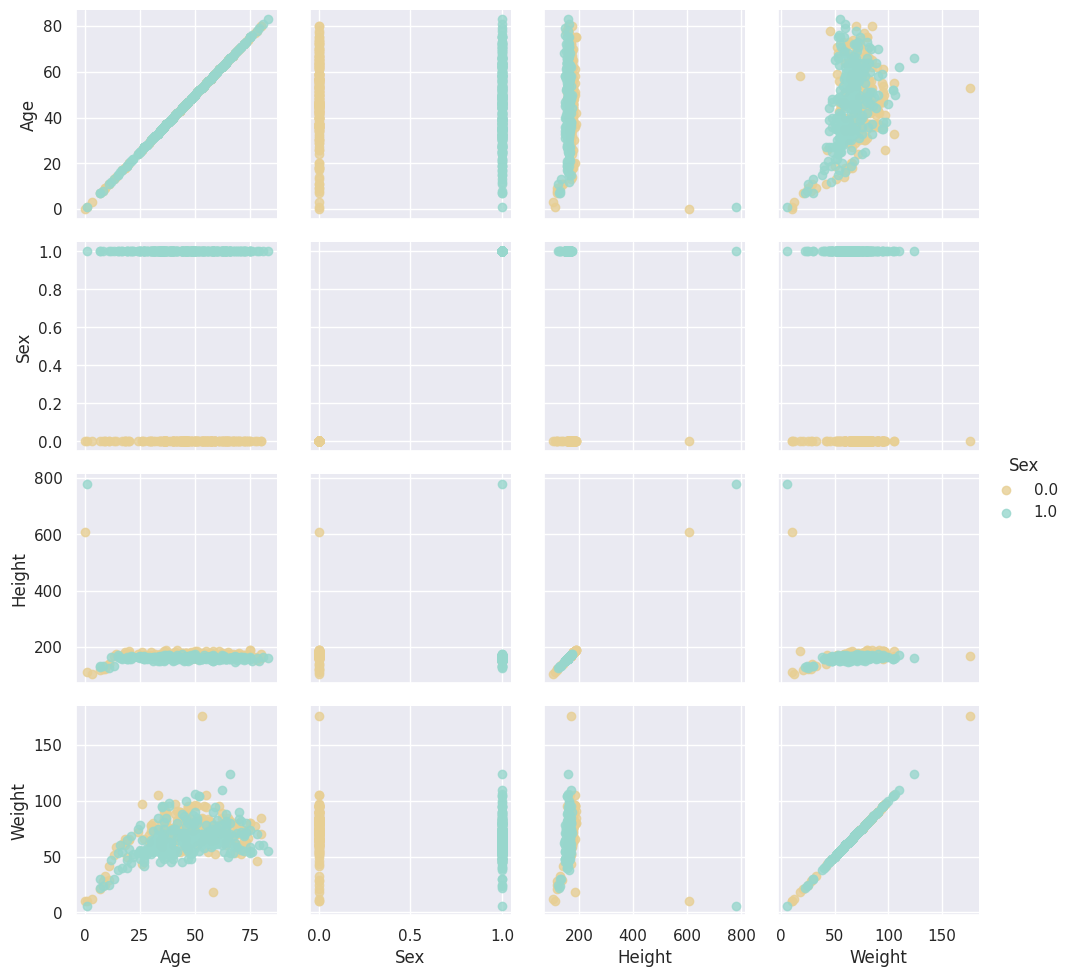

In [140]:
#Looking for pairwise relationship and outliers
g = sns.PairGrid(final_df, vars = ['Age','Sex','Height','Weight'], hue='Sex', palette='BrBG')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [141]:
sorted(final_df['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

In [142]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780,180)

In [143]:
sorted(final_df['Weight'], reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

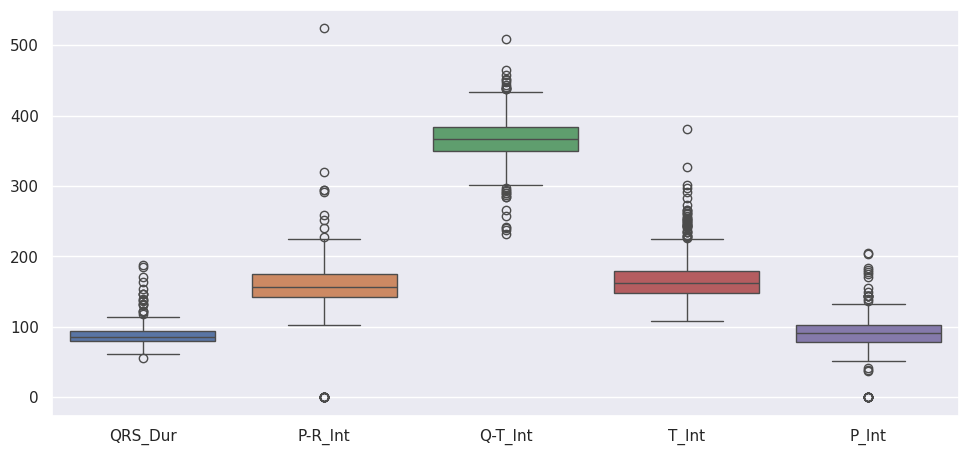

In [144]:
sns.boxplot(data=final_df[['QRS_Dur','P-R_Int','Q-T_Int','T_Int','P_Int']]);

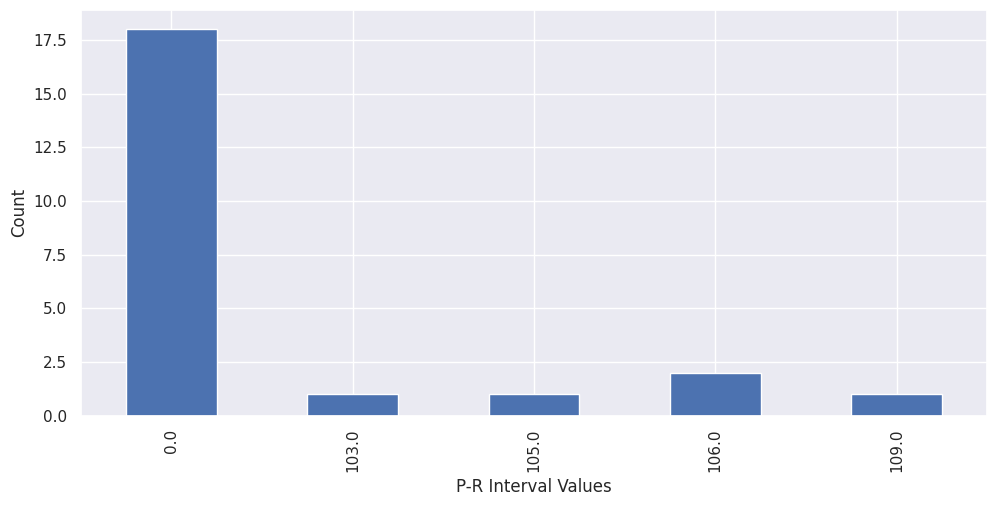

In [145]:
final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

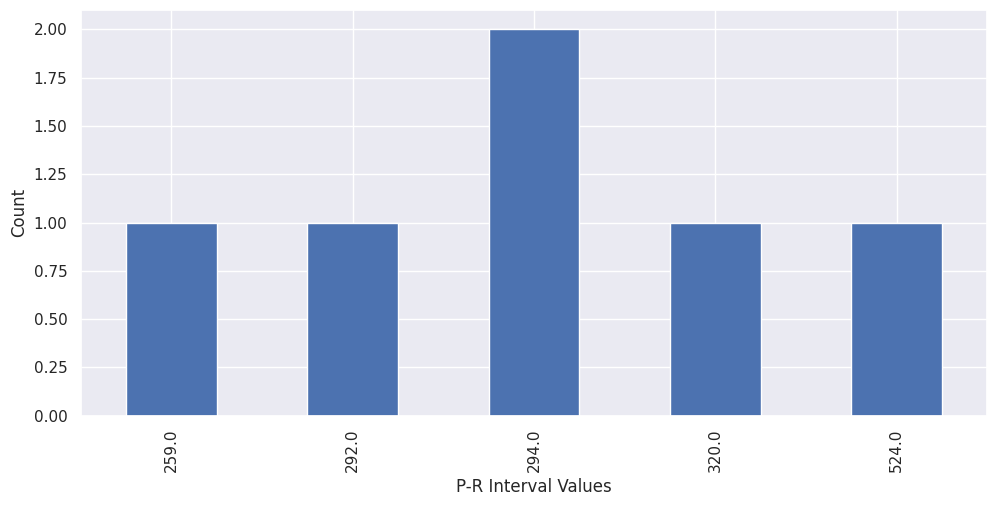

In [146]:
final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind = 'bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

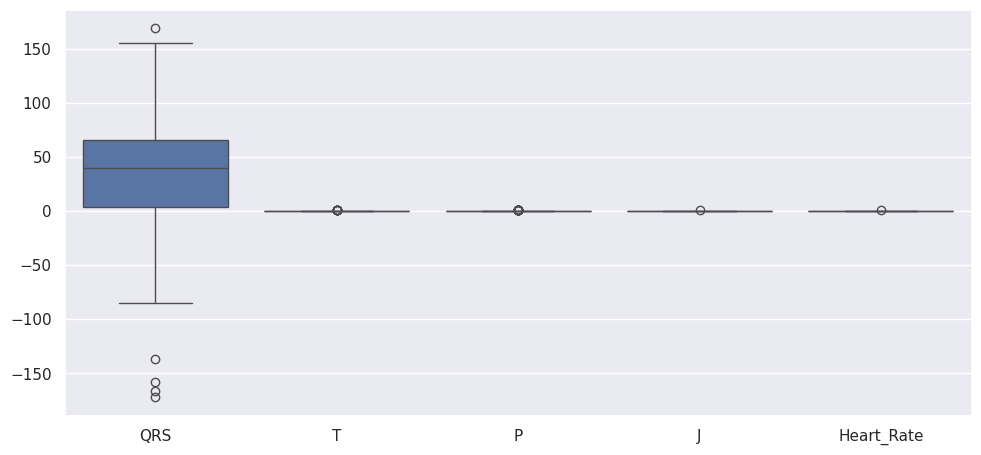

In [147]:
sns.boxplot(data = final_df[["QRS","T","P","J","Heart_Rate"]]);

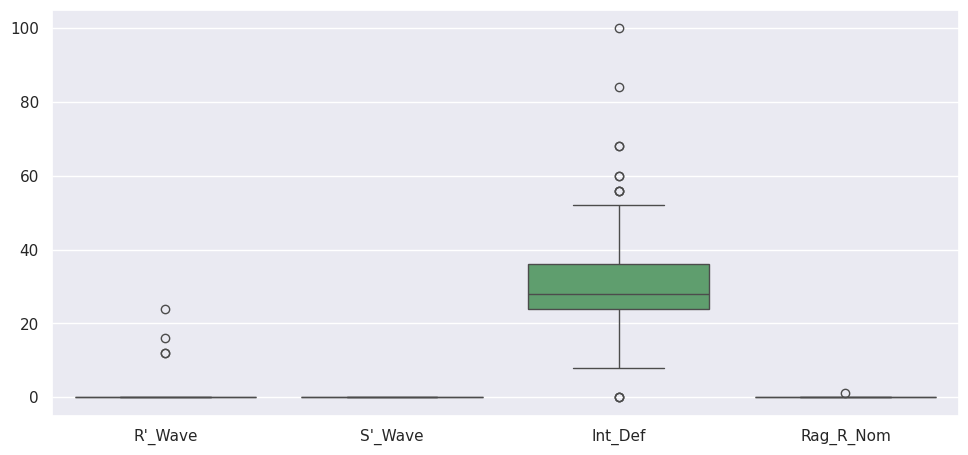

In [148]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);

In [149]:
#S'Wave has 0's which is not a NaN, so we can't assume it as an including outlier.

In [150]:
final_df["S'_Wave"].value_counts().sort_index(ascending=False)

,count
S'_Wave,
0.0,452


In [151]:
final_df["V101"].value_counts().sort_index(ascending=False)

,count
V101,
216.0,1
112.0,1
84.0,1
72.0,1
68.0,1
64.0,1
48.0,6
44.0,6
40.0,13


In [152]:
final_df["V201"].value_counts().sort_index(ascending=False)

,count
V201,
216.0,1
136.0,1
84.0,1
72.0,1
60.0,5
56.0,4
52.0,12
48.0,19
44.0,53


In [153]:
final_df["V301"].value_counts().sort_index(ascending=False)

,count
V301,
132.0,1
88.0,2
76.0,2
72.0,1
68.0,2
64.0,3
60.0,16
56.0,26
52.0,57


In [154]:
final_df["V501"].value_counts().sort_index(ascending=False)

,count
V501,
136.0,1
120.0,2
116.0,1
108.0,1
96.0,1
92.0,1
84.0,1
76.0,2
72.0,3


<Axes: >

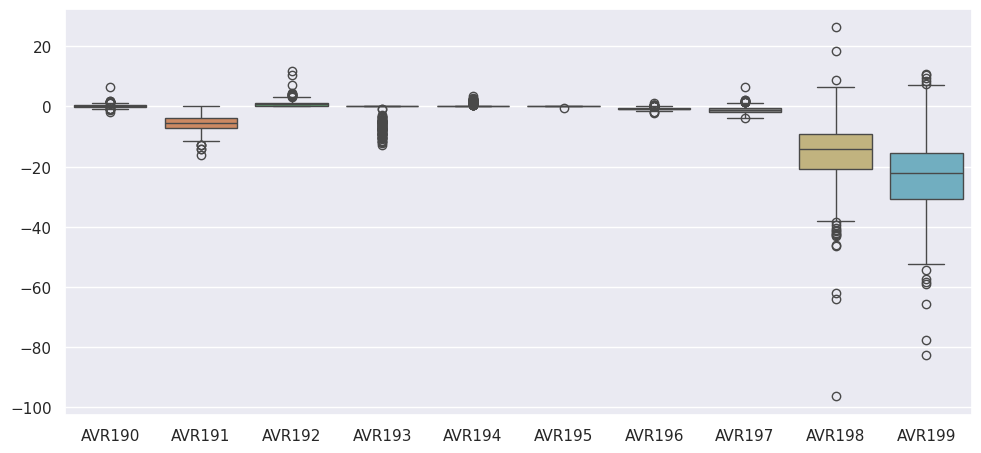

In [155]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR190","AVR191","AVR192","AVR193","AVR194",
                           "AVR195","AVR196","AVR197","AVR198","AVR199"]])

<Axes: >

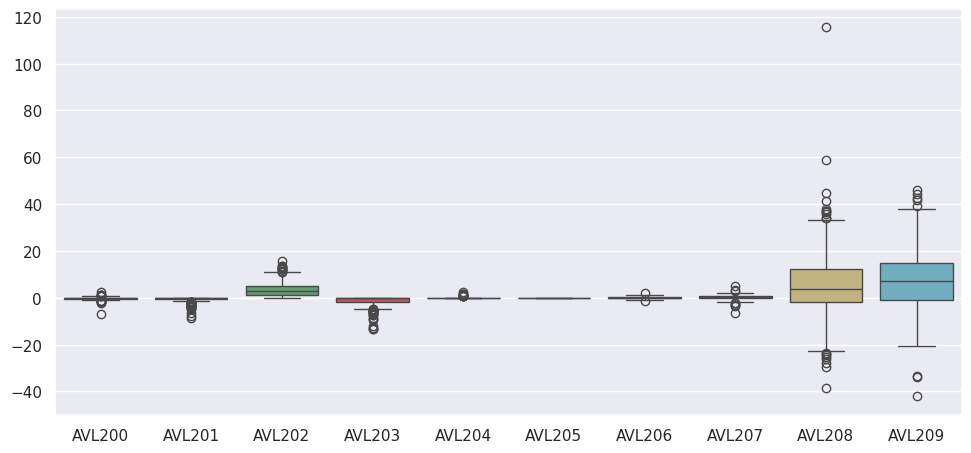

In [156]:
sns.set(rc={'figure.figsize':[11.7,5.27]})
sns.boxplot(data=final_df[["AVL200","AVL201","AVL202","AVL203","AVL204",
                           "AVL205","AVL206","AVL207","AVL208","AVL209"]])

<Axes: >

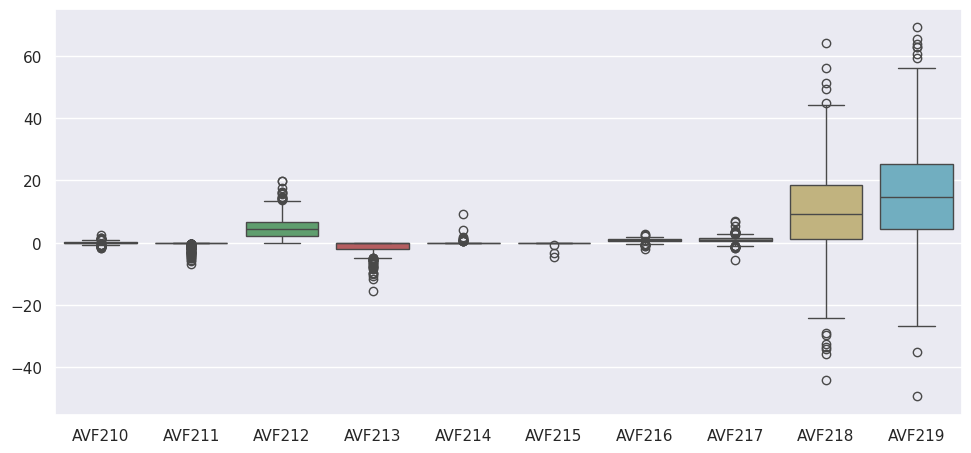

In [157]:
sns.set(rc={'figure.figsize':(11.7, 5.27)})
sns.boxplot(data=final_df[["AVF210","AVF211","AVF212","AVF213",
                           "AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]])

In [181]:
#finding correlation with target feature using pearson correlation

target=new_df["class"]
pearsoncorr = final_df.corrwith(other = target,method='pearson')
pearsoncorr.values

array([-9.23812218e-02, -1.78080037e-01, -3.46671442e-02, -9.01507390e-02,
        3.23878728e-01, -9.99540161e-02,  2.83049762e-02,  9.76253981e-02,
       -1.22002504e-01,  1.95854526e-02, -1.68648870e-04,  1.90644217e-01,
       -3.08114850e-02,  3.33672764e-02,  3.96491896e-03,  4.26738126e-02,
        1.95198200e-01,  6.39992472e-02,             nan,  4.27635327e-02,
       -2.01150248e-02,  7.67517615e-03, -3.55694451e-02,  3.20969797e-02,
        3.20969797e-02,  8.30559434e-02, -3.61168680e-03,  4.83674292e-02,
        1.83082712e-01, -1.05049431e-02,  6.65428889e-02,  6.77662940e-02,
        4.17574601e-02,  7.98435069e-02, -2.01150248e-02,  1.69531020e-02,
       -3.60504699e-02, -6.66334979e-04, -2.36687153e-02,  1.16515578e-01,
        8.16735582e-02,  1.44307782e-02, -3.20137575e-02,  8.34076694e-02,
       -3.08114850e-02,  5.14341059e-02, -3.08114850e-02, -8.40208668e-02,
       -1.15446555e-02, -5.76271452e-03,  2.10381327e-02,  1.73243101e-01,
        2.54790200e-03,  

In [159]:
#Feature scaling and splitting dataset

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target ,test_size=0.2, random_state=1)

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
import warnings
warnings.filterwarnings('ignore')

In [186]:
# importing evaluation metrices.

from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
# from scikitplot.metrics import plot_confusion_matrix,plot_roc
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
#Modelling

In [188]:
# will store result of each model.

result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

In [189]:
#KNN classifier

In [190]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)

In [191]:
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knnclassifier.predict(X_test))
knn_train_recall = recall_score(y_train, knnclassifier.predict(X_train),average="weighted")
knn_test_recall = recall_score(y_test, knnclassifier.predict(X_test),average="weighted")

In [192]:
print('Train Recall score: {}'
      .format(knn_train_recall))
print('Test Recall score: {}'
      .format(knn_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.6481994459833795
Test Recall score: 0.6483516483516484


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [195]:
result = pd.concat([result, pd.DataFrame([['KNN',knn_train_accuracy,knn_test_accuracy]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
0,KNN,0.648199,0.648352


In [196]:
#Logistic regression

In [197]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression(solver = 'saga', random_state=0)
lgclassifier.fit(X_train, y_train)
y_pred = lgclassifier.predict(X_test)

In [198]:
lg_train_recall=recall_score(y_train, lgclassifier.predict(X_train), average = 'weighted')
lg_test_recall=recall_score(y_test, lgclassifier.predict(X_test), average='weighted')
lg_train_accuracy = accuracy_score(y_train, lgclassifier.predict(X_train))
lg_test_accuracy = accuracy_score(y_test, lgclassifier.predict(X_test))

In [199]:
print('Train Recall score: {}'
      .format(lg_train_recall))
print('Test Recall score: {}'
      .format(lg_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.9390581717451524
Test Recall score: 0.7802197802197802


array([[46,  2,  0,  0,  0,  2,  0,  0,  0,  0,  2],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1]])

In [200]:
result = pd.concat([result, pd.DataFrame([['Logistic Regression',lg_train_accuracy,lg_test_accuracy]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
0,KNN,0.648199,0.648352
0,Logistic Regression,0.939058,0.780220


In [201]:
#Decision tree classifier

In [202]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=5)
dtclassifier.fit(X_train, y_train)
y_pred_test = dtclassifier.predict(X_test)
y_pred_train = dtclassifier.predict(X_train)

In [203]:
dt_train_recall=recall_score(y_train, dtclassifier.predict(X_train), average = 'weighted')
dt_test_recall=recall_score(y_test, dtclassifier.predict(X_test), average='weighted')
dt_train_recall = accuracy_score(y_train, y_pred_train)
dt_test_recall = accuracy_score(y_test, y_pred_test)

In [204]:
print("Train Recall Score: {}"
      .format(dt_train_recall))
print("Test Recall Score: {}"
      .format(dt_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall Score: 0.7894736842105263
Test Recall Score: 0.6813186813186813


array([[50,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 4,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0]])

In [205]:
result = pd.concat([result, pd.DataFrame([['Decision Tree',dt_train_recall,dt_test_recall]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
0,KNN,0.648199,0.648352
0,Logistic Regression,0.939058,0.780220
0,Decision Tree,0.789474,0.681319
